In [1]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *

In [2]:
# reading data and aggregating classes
df = get_raw_data('../data/allNamesClean.csv')
df.ethn = df.ethn.apply(aggregate_ethnos)

In [3]:
# filtering data
df_translit_ru = filter_data(df)

In [4]:
# spliting data to train and test sets
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru)

In [64]:
# trainin provided model and testing it
def train_and_eval_model(model):
    model.fit(X_train, y_train)
    print('Test data:')
    print(test_model(model, le, X_test, y_test))
    print()
    print('Train data:')
    print(test_model(model, le, X_train, y_train))

In [65]:
cnb_pipe = Pipeline(steps=[
    ('vect', CountVectorizer(analyzer='char', lowercase=False, max_df=0.05, min_df=1, ngram_range=(1, 7))),
    ('estimator', ComplementNB())])

Test data:


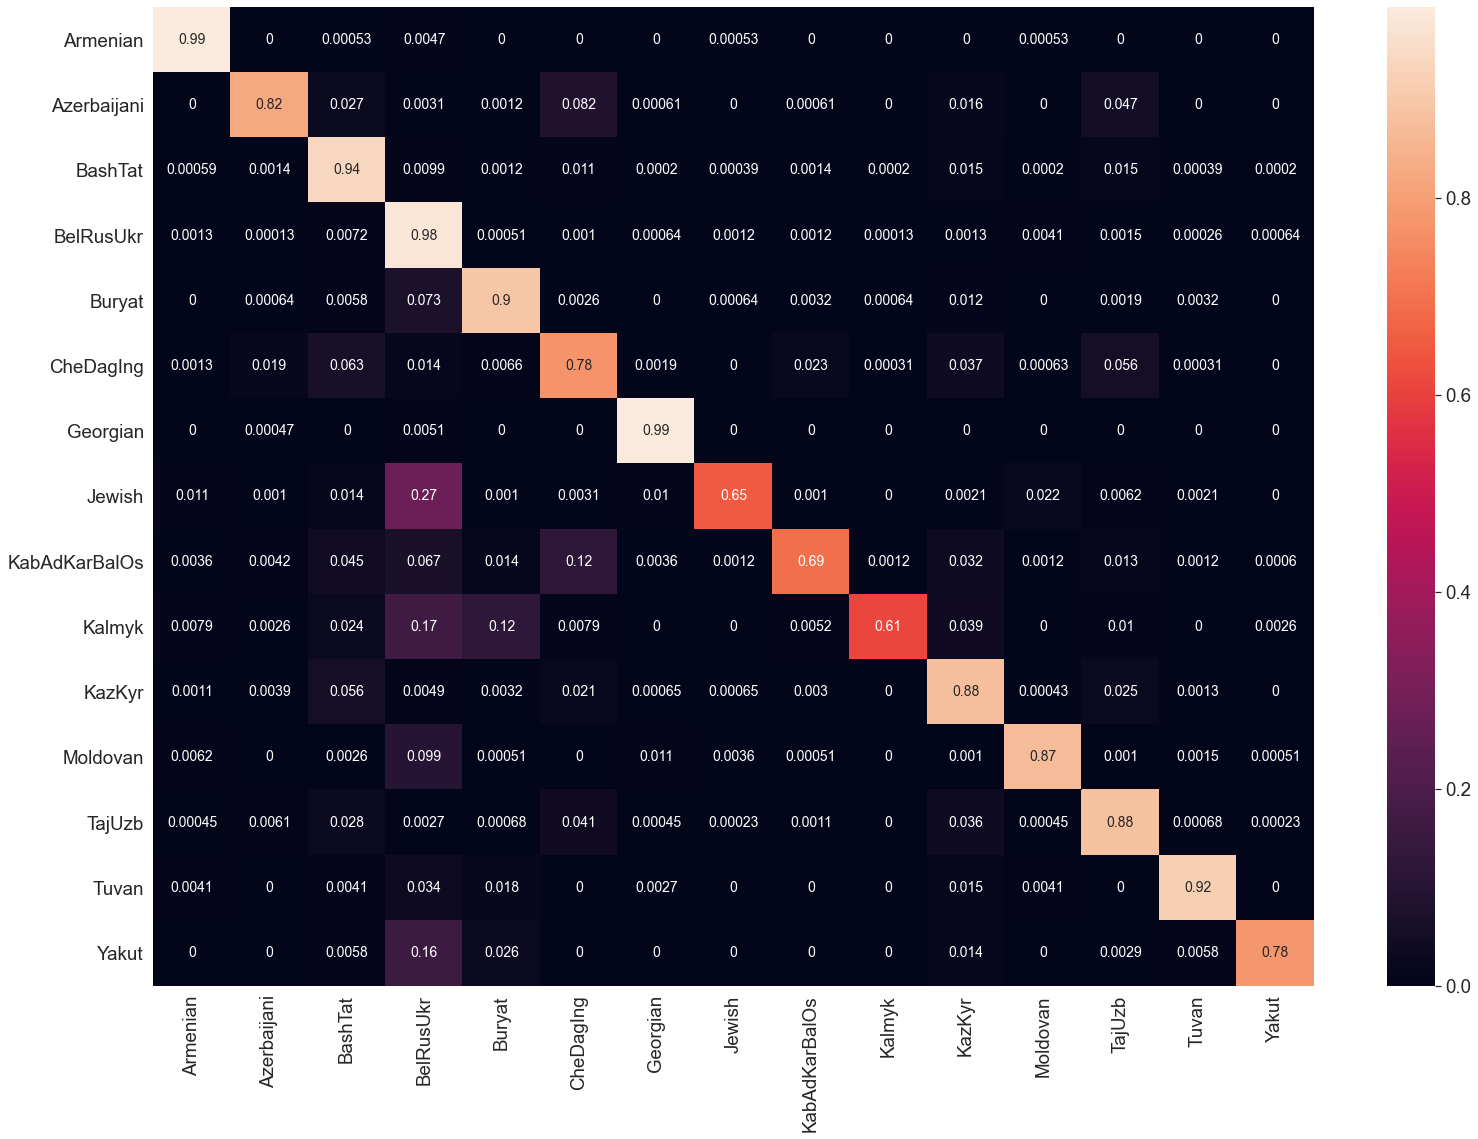

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9937	0.9697	0.9937	0.9815
Azerbaijani    	0.8223	0.9157	0.8223	0.8665
BashTat        	0.9432	0.8568	0.9432	0.8979
BelRusUkr      	0.9789	0.8852	0.9789	0.9297
Buryat         	0.8965	0.9063	0.8965	0.9014
CheDagIng      	0.7765	0.7834	0.7765	0.7799
Georgian       	0.9944	0.9739	0.9944	0.9841
Jewish         	0.6513	0.9607	0.6513	0.7763
KabAdKarBalOs  	0.6916	0.9075	0.6916	0.7850
Kalmyk         	0.6099	0.9749	0.6099	0.7504
KazKyr         	0.8799	0.8920	0.8799	0.8859
Moldovan       	0.8730	0.9626	0.8730	0.9156
TajUzb         	0.8822	0.8868	0.8822	0.8845
Tuvan          	0.9181	0.9601	0.9181	0.9386
Yakut          	0.7826	0.9643	0.7826	0.8640
{'accuracy': 0.8931287768285059, 'precision macro': 0.9199877213804961, 'recall macro': 0.8462847149778361, 'f1 macro': 0.8760912625603137}

Train data:


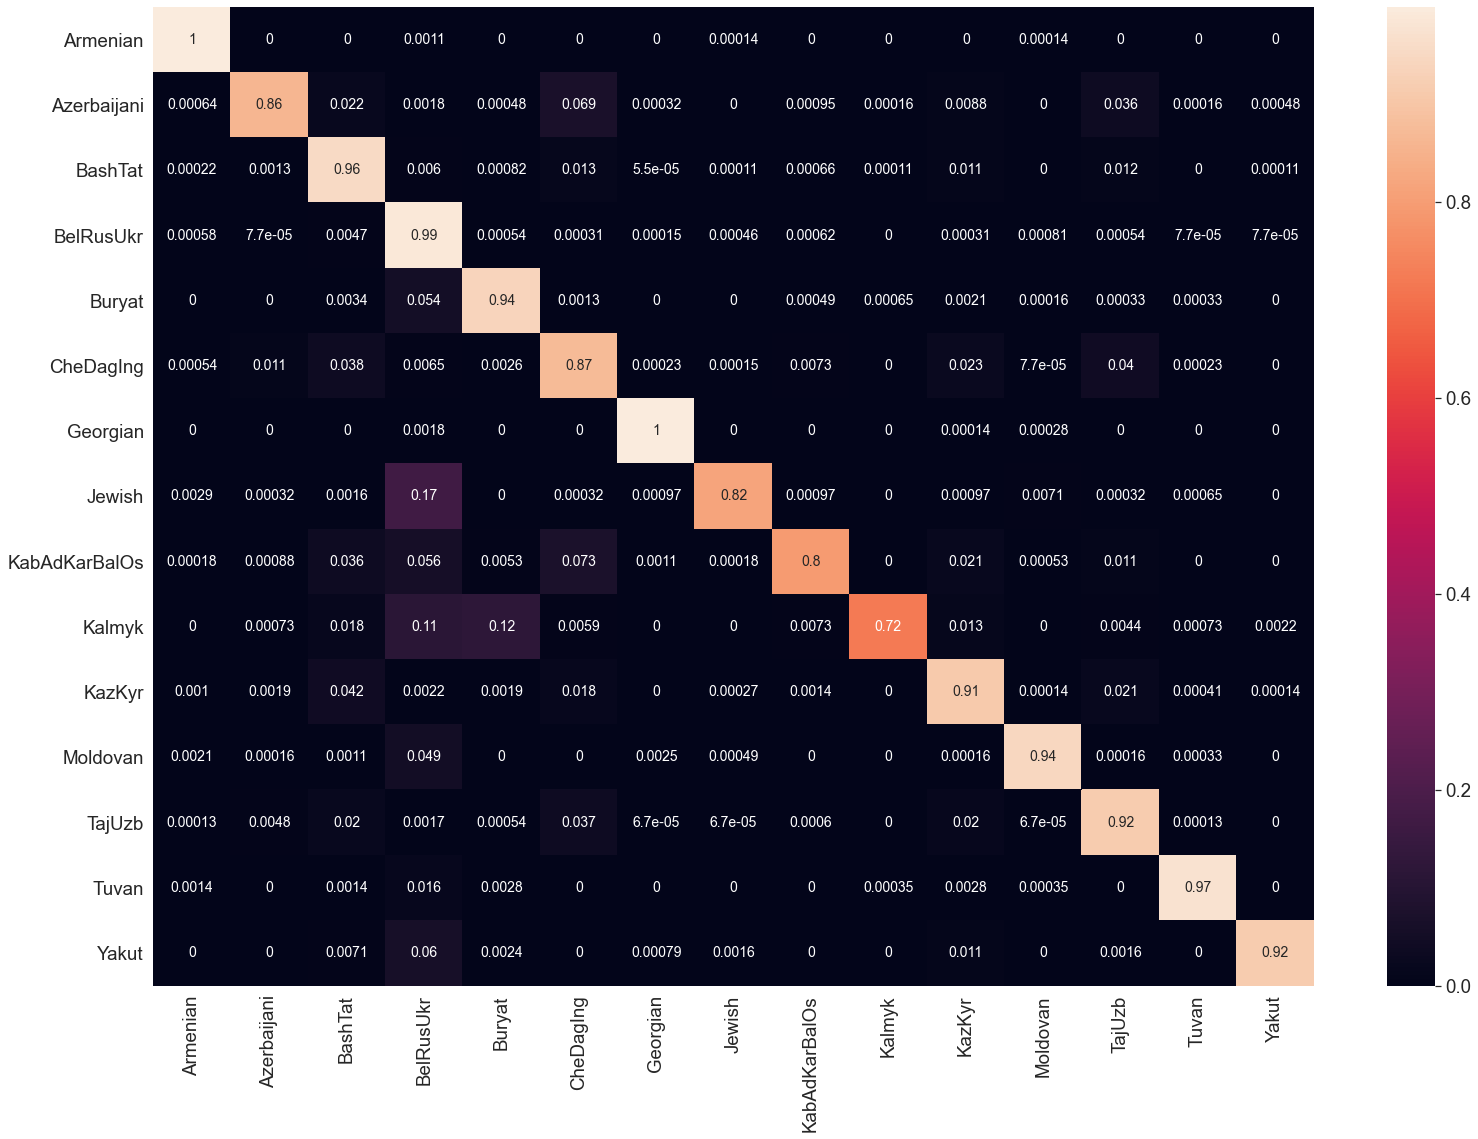

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9986	0.9900	0.9986	0.9943
Azerbaijani    	0.8590	0.9525	0.8590	0.9034
BashTat        	0.9553	0.8994	0.9553	0.9265
BelRusUkr      	0.9908	0.9271	0.9908	0.9579
Buryat         	0.9375	0.9499	0.9375	0.9436
CheDagIng      	0.8706	0.8545	0.8706	0.8625
Georgian       	0.9978	0.9950	0.9978	0.9964
Jewish         	0.8155	0.9890	0.8155	0.8939
KabAdKarBalOs  	0.7954	0.9627	0.7954	0.8711
Kalmyk         	0.7183	0.9919	0.7183	0.8332
KazKyr         	0.9100	0.9280	0.9100	0.9189
Moldovan       	0.9442	0.9906	0.9442	0.9668
TajUzb         	0.9150	0.9104	0.9150	0.9127
Tuvan          	0.9748	0.9924	0.9748	0.9836
Yakut          	0.9158	0.9897	0.9158	0.9513
{'accuracy': 0.93097215583174, 'precision macro': 0.9548772474890578, 'recall macro': 0.9065757884243062, 'f1 macro': 0.9277398167005304}


In [66]:
train_and_eval_model(cnb_pipe)

In [82]:
svm = Pipeline(steps=[
    ('vect', CountVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.55, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=5e-06, class_weight=None, early_stopping=False, loss='hinge', 
                                penalty='elasticnet', random_state=0))])

Test data:


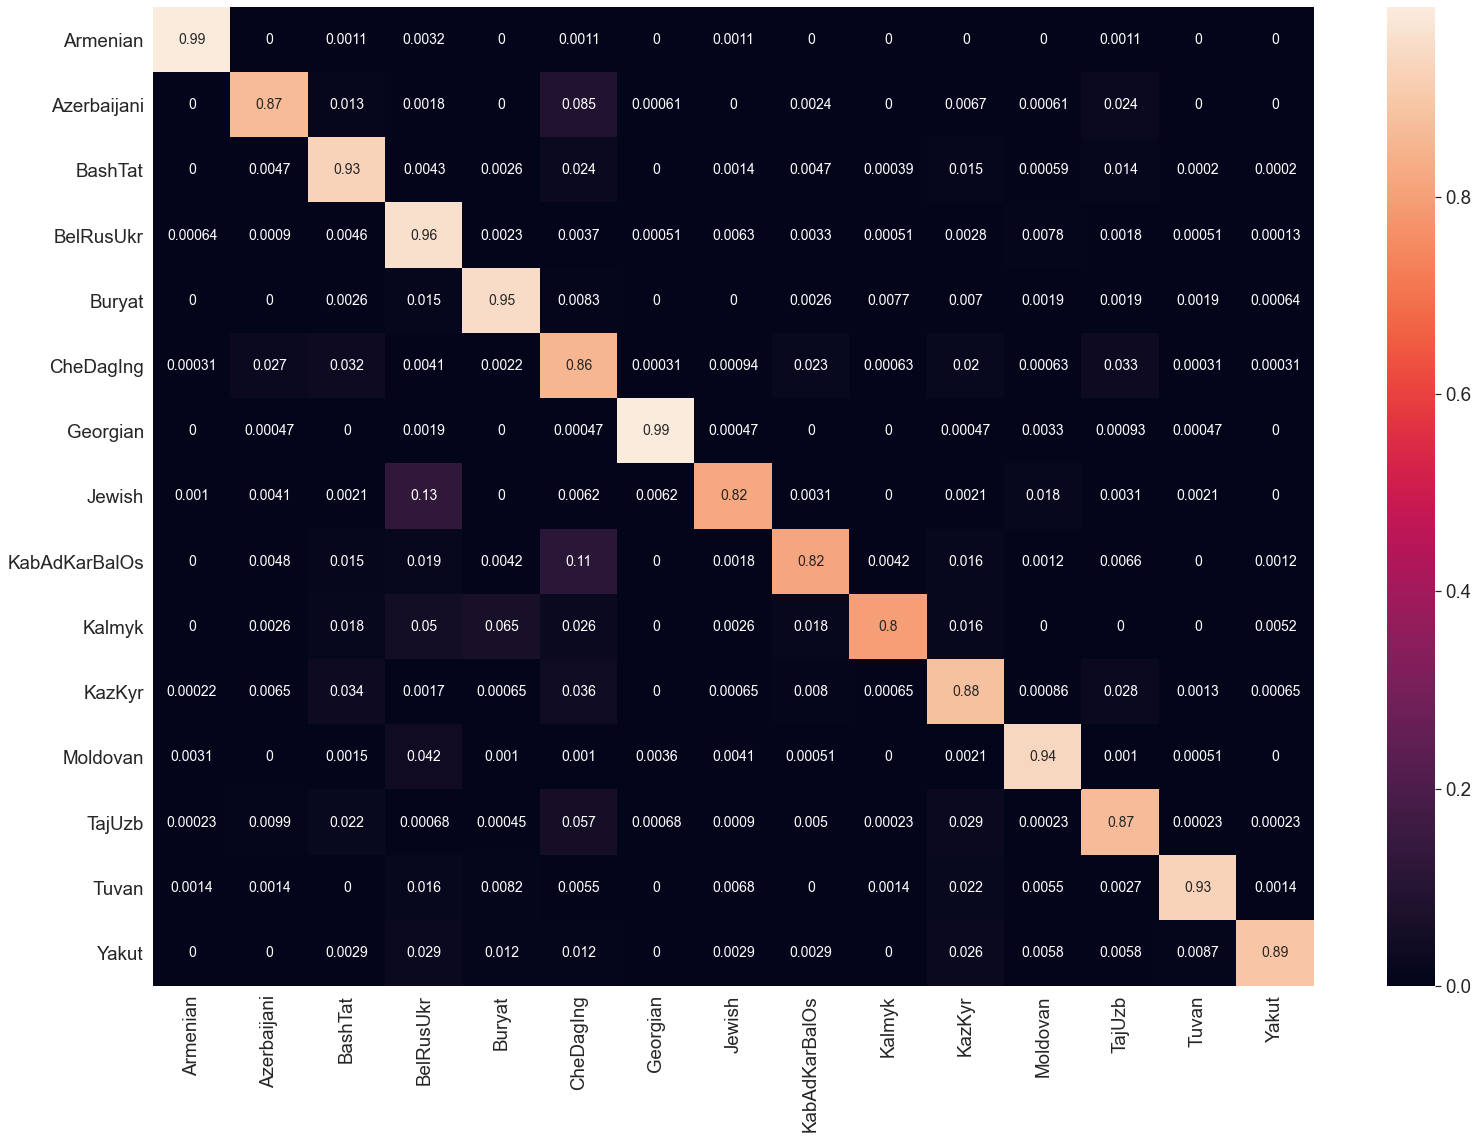

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9926	0.9916	0.9926	0.9921
Azerbaijani    	0.8651	0.8725	0.8651	0.8688
BashTat        	0.9287	0.9107	0.9287	0.9196
BelRusUkr      	0.9640	0.9537	0.9640	0.9588
Buryat         	0.9502	0.9447	0.9502	0.9474
CheDagIng      	0.8556	0.7450	0.8556	0.7965
Georgian       	0.9916	0.9897	0.9916	0.9907
Jewish         	0.8205	0.9019	0.8205	0.8593
KabAdKarBalOs  	0.8163	0.8708	0.8163	0.8427
Kalmyk         	0.7958	0.9048	0.7958	0.8468
KazKyr         	0.8808	0.9153	0.8808	0.8977
Moldovan       	0.9398	0.9442	0.9398	0.9420
TajUzb         	0.8723	0.9097	0.8723	0.8906
Tuvan          	0.9277	0.9673	0.9277	0.9471
Yakut          	0.8928	0.9595	0.8928	0.9249
{'accuracy': 0.9136017920400084, 'precision macro': 0.9187641071108904, 'recall macro': 0.8995776877534438, 'f1 macro': 0.9083307219403453}

Train data:


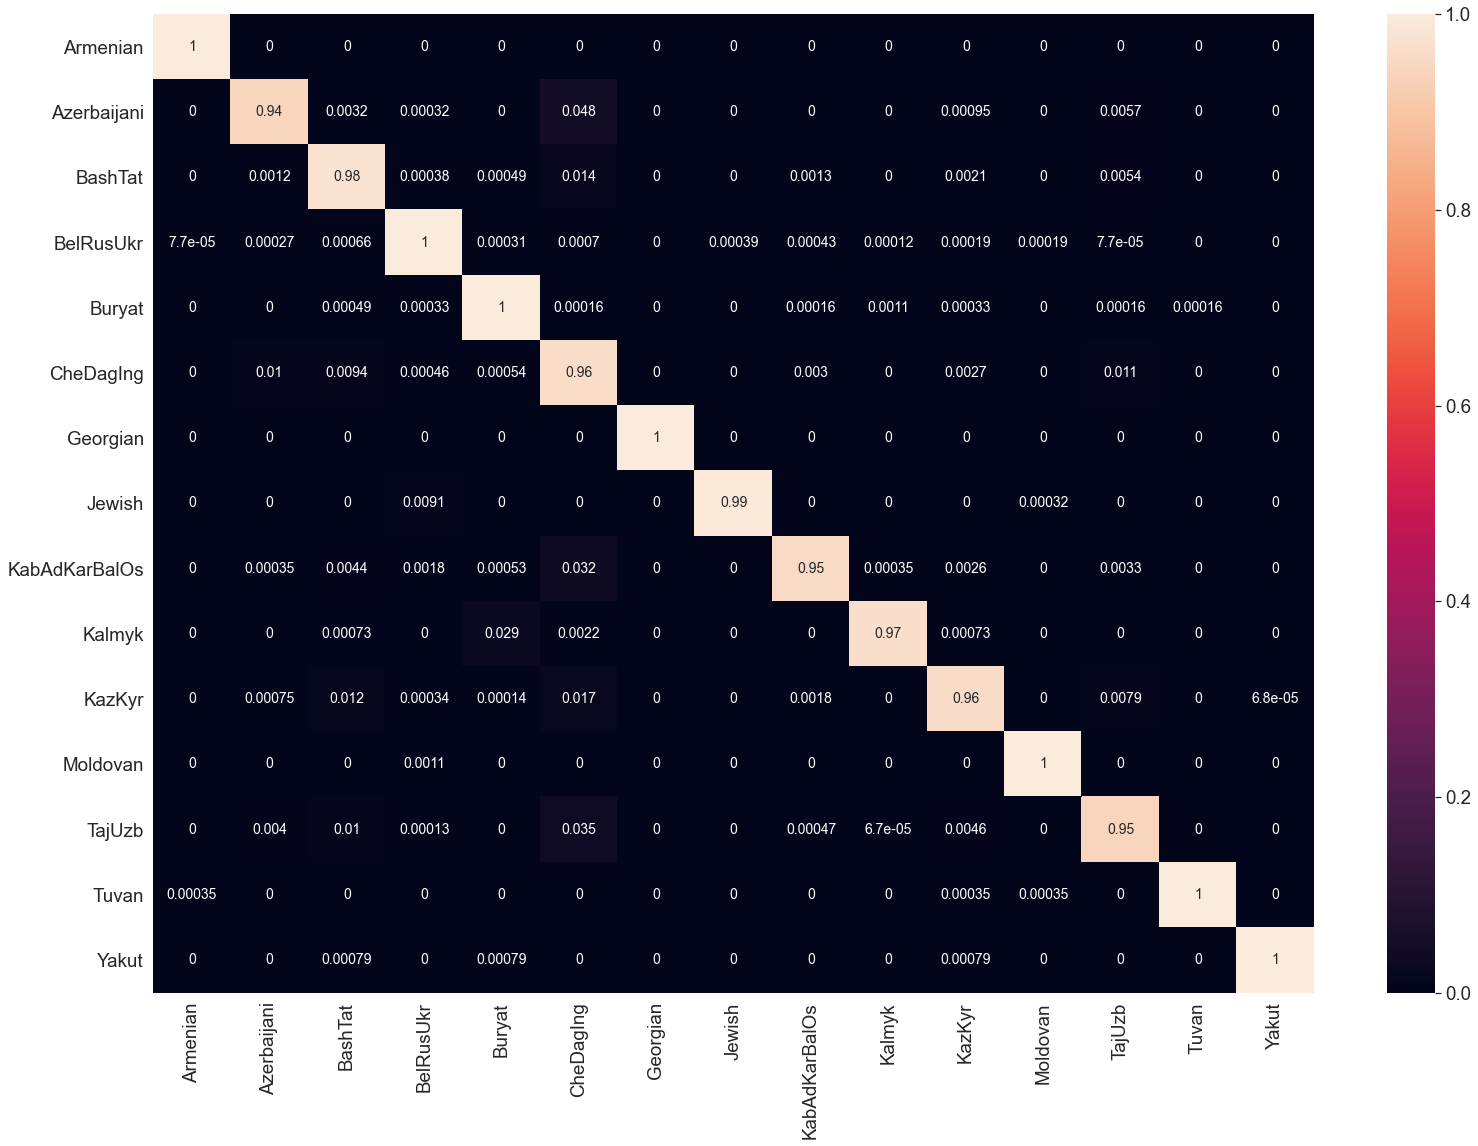

Ethnos          Acc	Prec	Rec	F1
Armenian       	1.0000	0.9996	1.0000	0.9998
Azerbaijani    	0.9421	0.9618	0.9421	0.9518
BashTat        	0.9753	0.9719	0.9753	0.9736
BelRusUkr      	0.9966	0.9973	0.9966	0.9970
Buryat         	0.9971	0.9888	0.9971	0.9929
CheDagIng      	0.9629	0.8903	0.9629	0.9252
Georgian       	1.0000	1.0000	1.0000	1.0000
Jewish         	0.9906	0.9967	0.9906	0.9936
KabAdKarBalOs  	0.9542	0.9805	0.9542	0.9672
Kalmyk         	0.9677	0.9902	0.9677	0.9788
KazKyr         	0.9602	0.9878	0.9602	0.9738
Moldovan       	0.9989	0.9989	0.9989	0.9989
TajUzb         	0.9452	0.9719	0.9452	0.9584
Tuvan          	0.9989	0.9996	0.9989	0.9993
Yakut          	0.9976	0.9992	0.9976	0.9984
{'accuracy': 0.9764952796367112, 'precision macro': 0.9823089662913833, 'recall macro': 0.9791524543238423, 'f1 macro': 0.9805809985841579}


In [83]:
train_and_eval_model(svm)

In [77]:
huber = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

Test data:


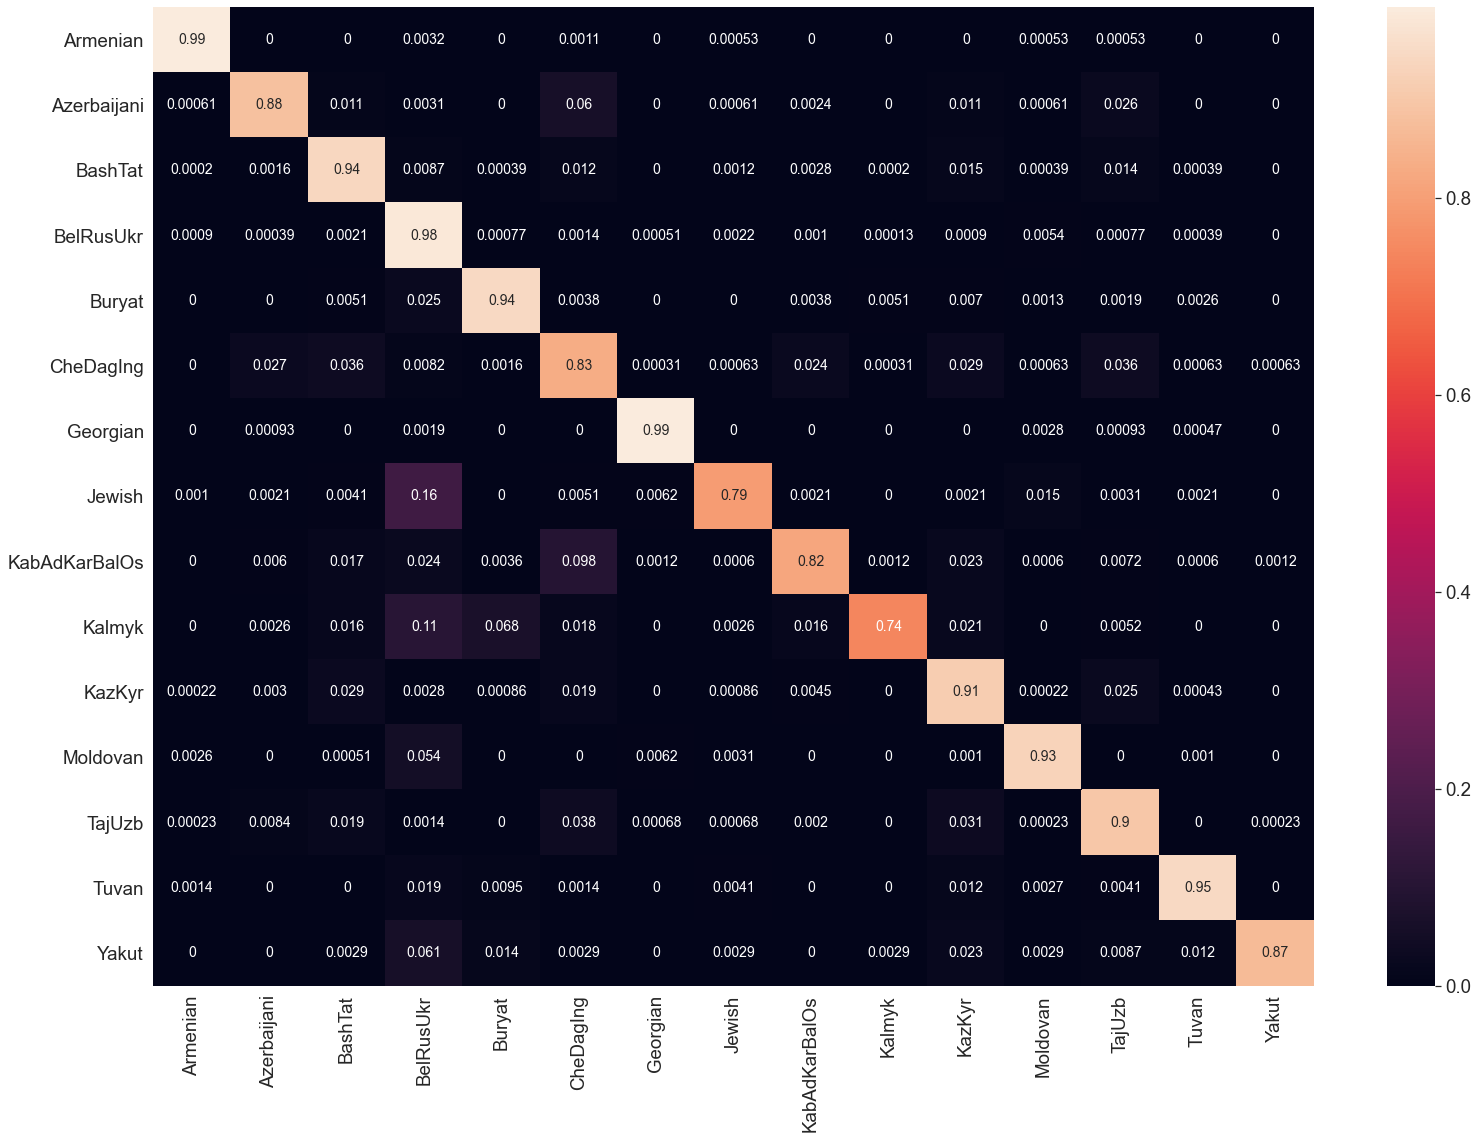

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9942	0.9905	0.9942	0.9924
Azerbaijani    	0.8846	0.8983	0.8846	0.8914
BashTat        	0.9434	0.9197	0.9434	0.9314
BelRusUkr      	0.9832	0.9359	0.9832	0.9589
Buryat         	0.9444	0.9604	0.9444	0.9523
CheDagIng      	0.8343	0.8131	0.8343	0.8235
Georgian       	0.9930	0.9870	0.9930	0.9900
Jewish         	0.7928	0.9438	0.7928	0.8618
KabAdKarBalOs  	0.8163	0.9021	0.8163	0.8571
Kalmyk         	0.7435	0.9530	0.7435	0.8353
KazKyr         	0.9146	0.9120	0.9146	0.9133
Moldovan       	0.9316	0.9592	0.9316	0.9452
TajUzb         	0.8976	0.9135	0.8976	0.9055
Tuvan          	0.9454	0.9679	0.9454	0.9565
Yakut          	0.8667	0.9836	0.8667	0.9214
{'accuracy': 0.9238903938320483, 'precision macro': 0.9360045146264696, 'recall macro': 0.89903355455961, 'f1 macro': 0.9157354607602727}

Train data:


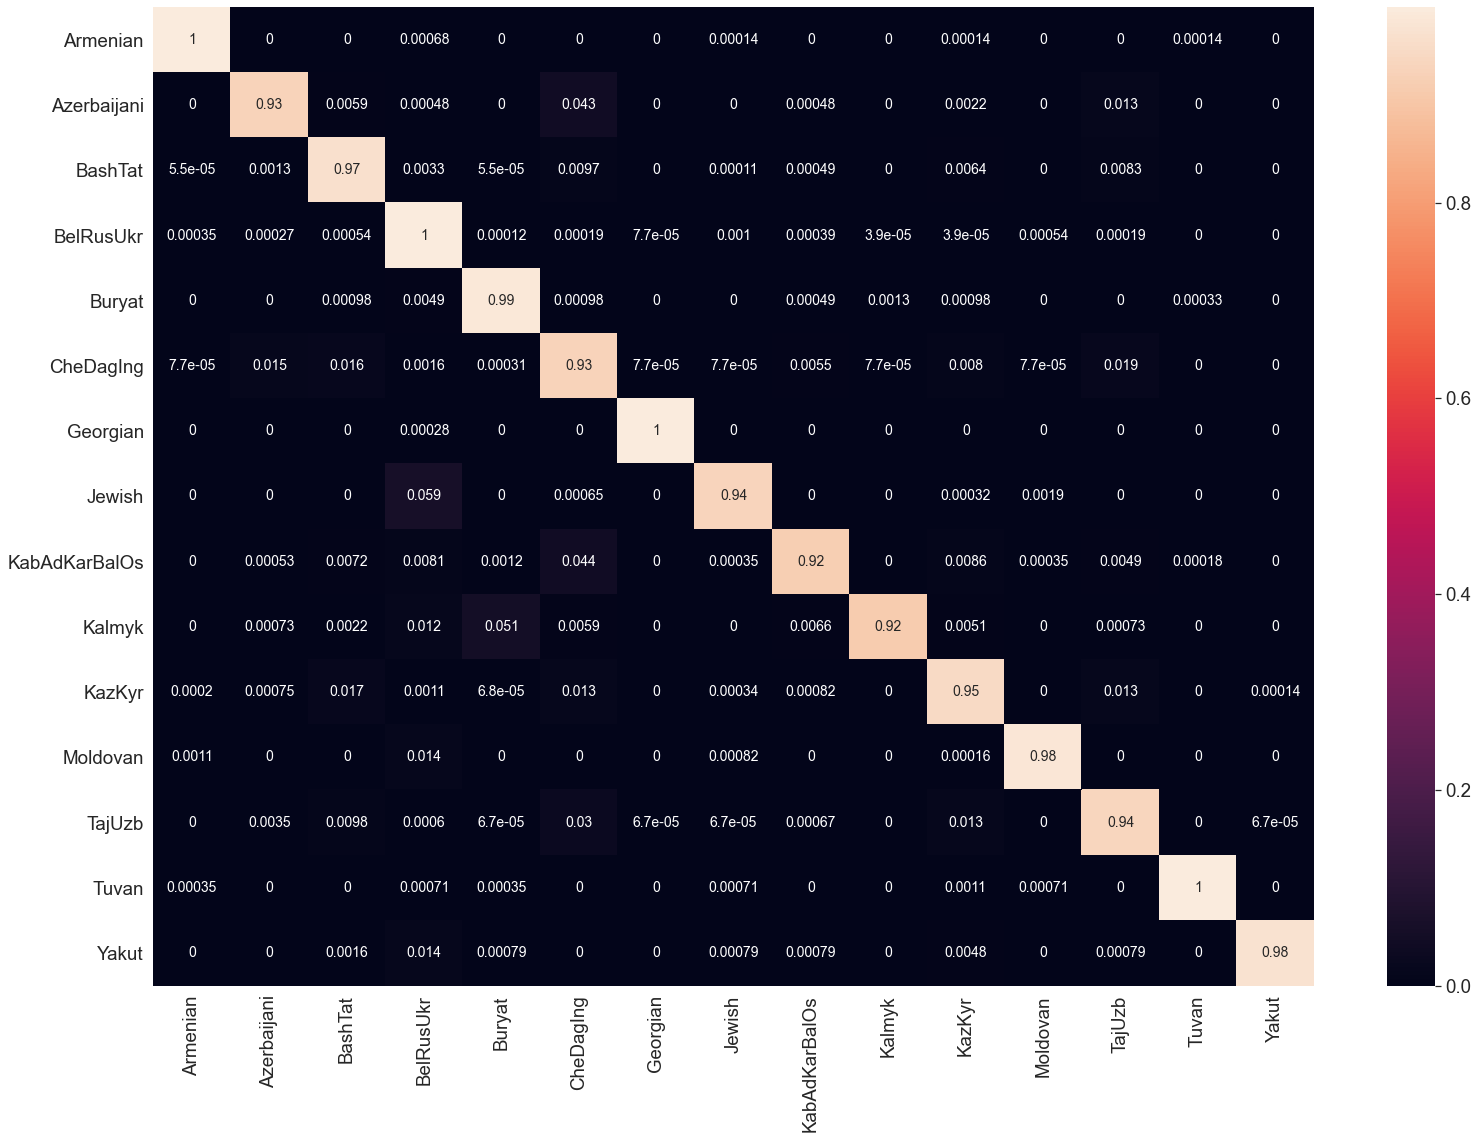

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9989	0.9970	0.9989	0.9980
Azerbaijani    	0.9346	0.9533	0.9346	0.9438
BashTat        	0.9703	0.9618	0.9703	0.9660
BelRusUkr      	0.9962	0.9812	0.9962	0.9886
Buryat         	0.9900	0.9855	0.9900	0.9878
CheDagIng      	0.9339	0.8986	0.9339	0.9159
Georgian       	0.9997	0.9994	0.9997	0.9996
Jewish         	0.9380	0.9840	0.9380	0.9604
KabAdKarBalOs  	0.9241	0.9762	0.9241	0.9494
Kalmyk         	0.9156	0.9921	0.9156	0.9523
KazKyr         	0.9534	0.9653	0.9534	0.9593
Moldovan       	0.9841	0.9959	0.9841	0.9900
TajUzb         	0.9421	0.9516	0.9421	0.9468
Tuvan          	0.9961	0.9986	0.9961	0.9973
Yakut          	0.9762	0.9976	0.9762	0.9868
{'accuracy': 0.967144180210325, 'precision macro': 0.9758613491143255, 'recall macro': 0.9635515620179178, 'f1 macro': 0.9694715276168081}


In [78]:
train_and_eval_model(huber)

In [71]:
lr = Pipeline(steps=[
    ('vect', CountVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.65, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=2.5e-05, class_weight=None, early_stopping=False, loss='log', 
                                penalty='elasticnet', random_state=0))])

Test data:


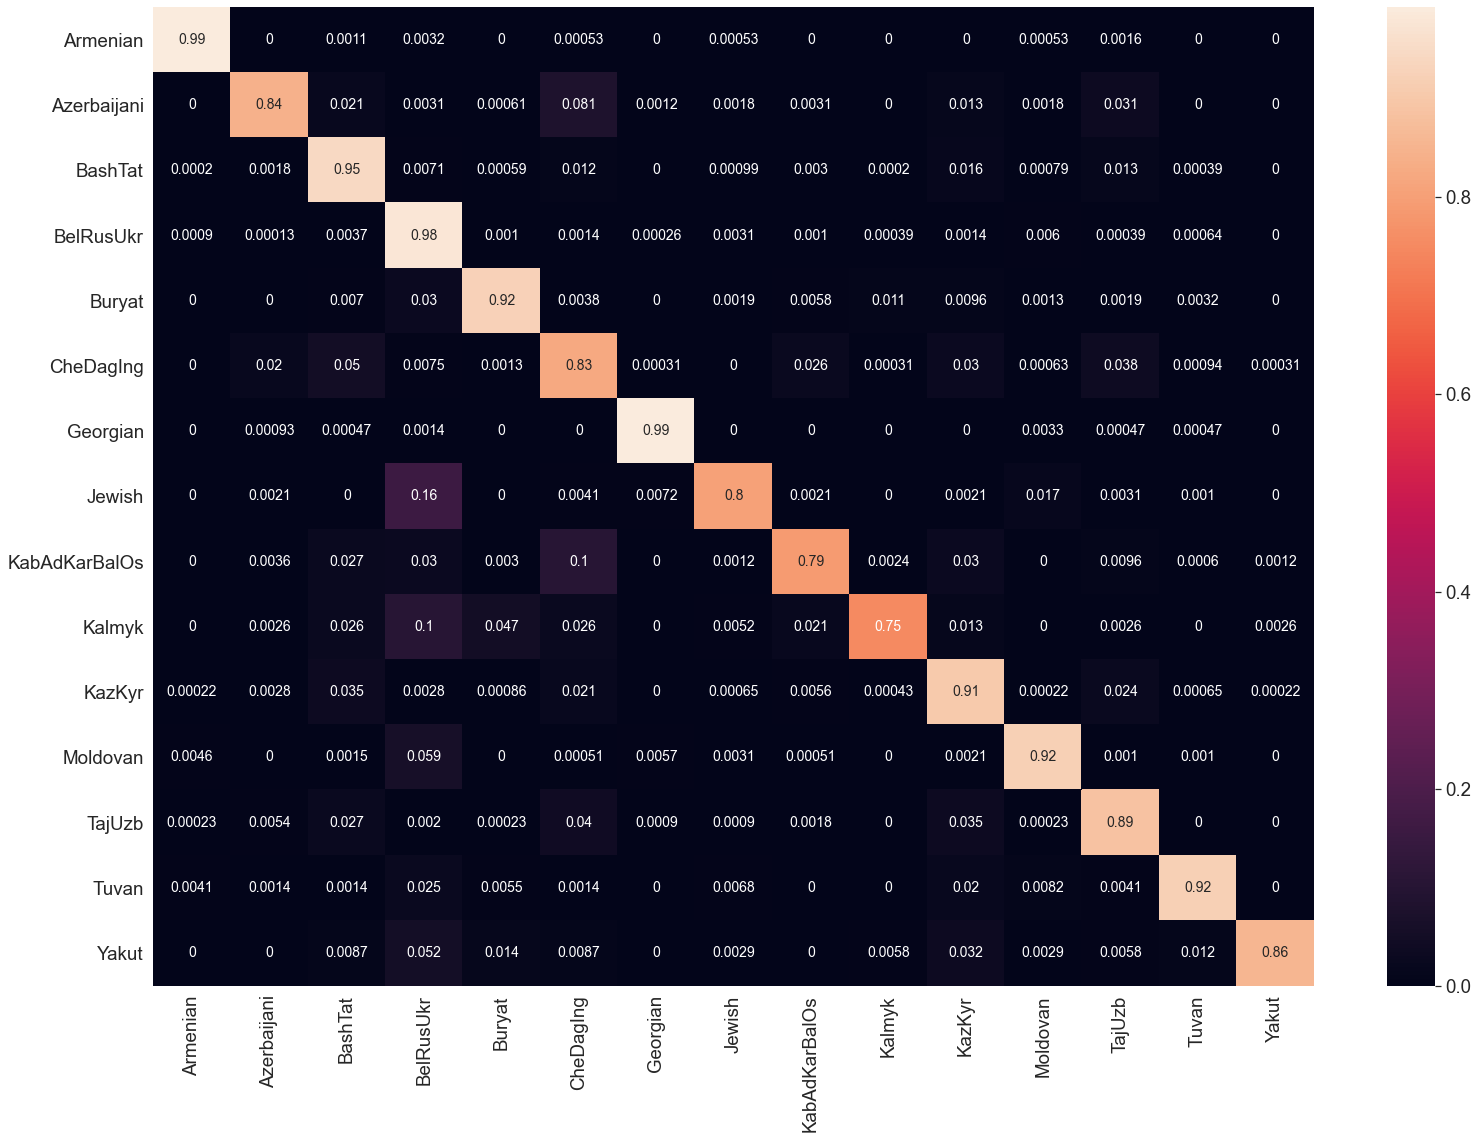

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9926	0.9885	0.9926	0.9905
Azerbaijani    	0.8425	0.9188	0.8425	0.8790
BashTat        	0.9452	0.8924	0.9452	0.9181
BelRusUkr      	0.9796	0.9342	0.9796	0.9563
Buryat         	0.9246	0.9647	0.9246	0.9442
CheDagIng      	0.8252	0.7959	0.8252	0.8103
Georgian       	0.9930	0.9875	0.9930	0.9902
Jewish         	0.8031	0.9299	0.8031	0.8619
KabAdKarBalOs  	0.7886	0.8887	0.7886	0.8356
Kalmyk         	0.7487	0.9051	0.7487	0.8195
KazKyr         	0.9053	0.9010	0.9053	0.9032
Moldovan       	0.9213	0.9512	0.9213	0.9360
TajUzb         	0.8872	0.9107	0.8872	0.8988
Tuvan          	0.9222	0.9616	0.9222	0.9415
Yakut          	0.8551	0.9833	0.8551	0.9147
{'accuracy': 0.9156855594915607, 'precision macro': 0.92755812980104, 'recall macro': 0.888941323087853, 'f1 macro': 0.9066528853008404}

Train data:


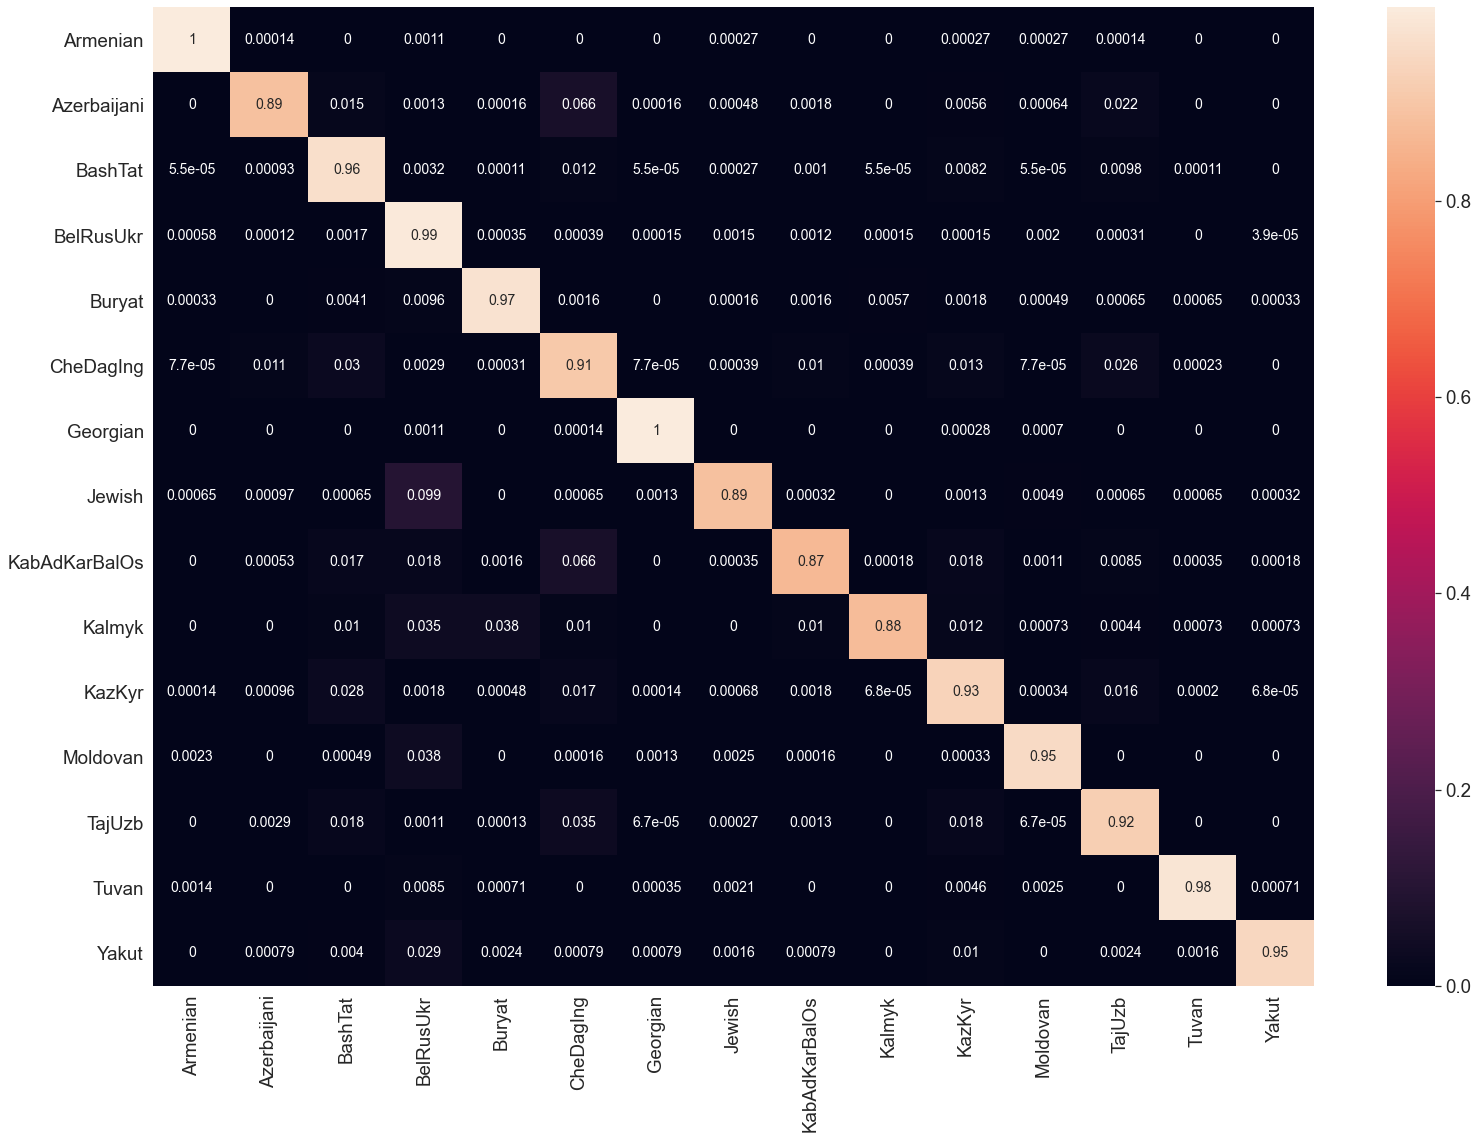

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9978	0.9945	0.9978	0.9961
Azerbaijani    	0.8873	0.9602	0.8873	0.9223
BashTat        	0.9647	0.9287	0.9647	0.9463
BelRusUkr      	0.9913	0.9635	0.9913	0.9772
Buryat         	0.9729	0.9850	0.9729	0.9789
CheDagIng      	0.9053	0.8669	0.9053	0.8857
Georgian       	0.9978	0.9967	0.9978	0.9972
Jewish         	0.8886	0.9664	0.8886	0.9259
KabAdKarBalOs  	0.8676	0.9493	0.8676	0.9066
Kalmyk         	0.8767	0.9622	0.8767	0.9175
KazKyr         	0.9316	0.9449	0.9316	0.9382
Moldovan       	0.9549	0.9828	0.9549	0.9686
TajUzb         	0.9235	0.9344	0.9235	0.9289
Tuvan          	0.9791	0.9932	0.9791	0.9861
Yakut          	0.9460	0.9925	0.9460	0.9687
{'accuracy': 0.9491515296367112, 'precision macro': 0.9614044615622214, 'recall macro': 0.9390132168688706, 'f1 macro': 0.9496234612217851}


In [72]:
train_and_eval_model(lr)

# Hyperparameters tuning

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done  54 out of  54 | elapsed:  8.4min finished


{'model__alpha': 1e-05, 'model__class_weight': None, 'model__early_stopping': False, 'model__loss': 'modified_huber', 'model__penalty': 'elasticnet', 'model__random_state': 0, 'vect__analyzer': 'char', 'vect__lowercase': False, 'vect__max_df': 0.45, 'vect__min_df': 1, 'vect__ngram_range': (1, 5)}


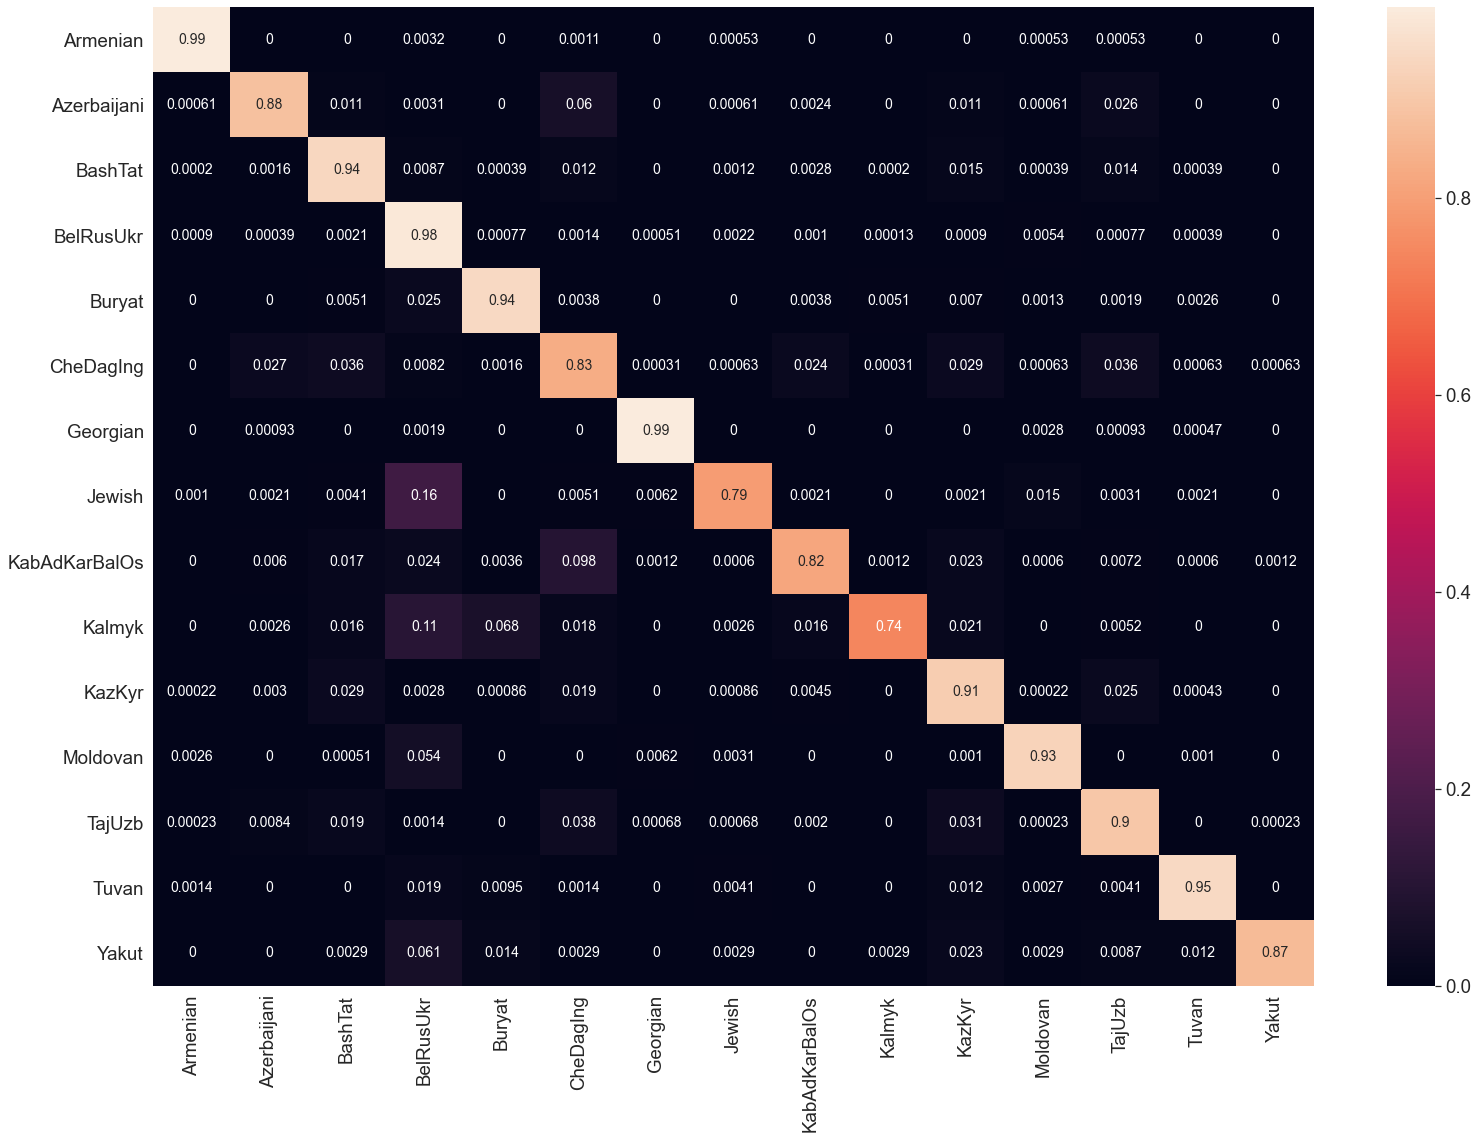

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9942	0.9905	0.9942	0.9924
Azerbaijani    	0.8846	0.8983	0.8846	0.8914
BashTat        	0.9434	0.9197	0.9434	0.9314
BelRusUkr      	0.9832	0.9359	0.9832	0.9589
Buryat         	0.9444	0.9604	0.9444	0.9523
CheDagIng      	0.8343	0.8131	0.8343	0.8235
Georgian       	0.9930	0.9870	0.9930	0.9900
Jewish         	0.7928	0.9438	0.7928	0.8618
KabAdKarBalOs  	0.8163	0.9021	0.8163	0.8571
Kalmyk         	0.7435	0.9530	0.7435	0.8353
KazKyr         	0.9146	0.9120	0.9146	0.9133
Moldovan       	0.9316	0.9592	0.9316	0.9452
TajUzb         	0.8976	0.9135	0.8976	0.9055
Tuvan          	0.9454	0.9679	0.9454	0.9565
Yakut          	0.8667	0.9836	0.8667	0.9214
{'accuracy': 0.9238903938320483, 'precision macro': 0.9360045146264696, 'recall macro': 0.89903355455961, 'f1 macro': 0.9157354607602727}


In [79]:
huber = proc_model(SGDClassifier(),
                 {'loss' : ['modified_huber'], 'penalty' : ['elasticnet'], 'alpha' : [1e-05],
                  'early_stopping' : [False], 'class_weight': [None, 'balanced'], 'random_state': [0]},
                 le, X_train, y_train, X_test, y_test, 
                 vectorization='tfidf', vect_params={
                     'analyzer': ['char'],
                     'ngram_range': [(1, 4), (1, 5), (1, 6)],
                     'max_df': [0.425, 0.45, 0.475],
                     'min_df': [1],
                     'lowercase': [False],
                 })

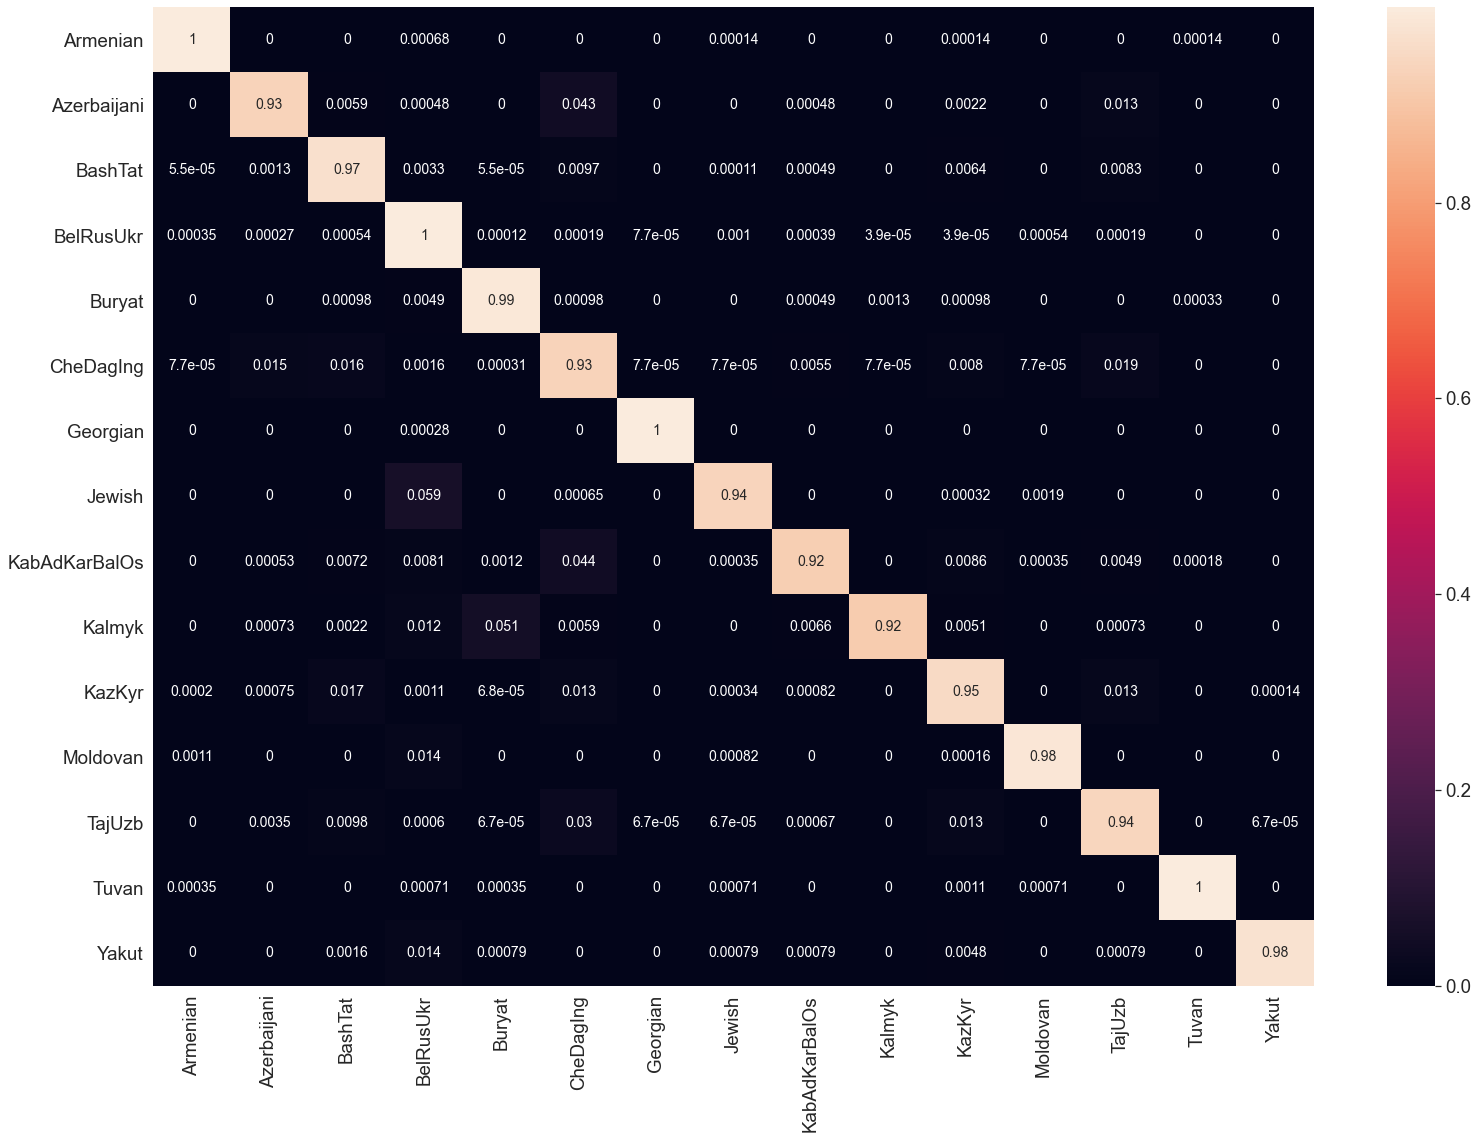

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9989	0.9970	0.9989	0.9980
Azerbaijani    	0.9346	0.9533	0.9346	0.9438
BashTat        	0.9703	0.9618	0.9703	0.9660
BelRusUkr      	0.9962	0.9812	0.9962	0.9886
Buryat         	0.9900	0.9855	0.9900	0.9878
CheDagIng      	0.9339	0.8986	0.9339	0.9159
Georgian       	0.9997	0.9994	0.9997	0.9996
Jewish         	0.9380	0.9840	0.9380	0.9604
KabAdKarBalOs  	0.9241	0.9762	0.9241	0.9494
Kalmyk         	0.9156	0.9921	0.9156	0.9523
KazKyr         	0.9534	0.9653	0.9534	0.9593
Moldovan       	0.9841	0.9959	0.9841	0.9900
TajUzb         	0.9421	0.9516	0.9421	0.9468
Tuvan          	0.9961	0.9986	0.9961	0.9973
Yakut          	0.9762	0.9976	0.9762	0.9868


{'accuracy': 0.967144180210325,
 'precision macro': 0.9758613491143255,
 'recall macro': 0.9635515620179178,
 'f1 macro': 0.9694715276168081}

In [81]:
test_model(huber, le, X_train, y_train)